<a href="https://colab.research.google.com/github/virajvaidya/ValueAtRiskModel/blob/main/ASX5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

from scipy.stats import norm

import yfinance          as yf
import pandas            as pd
import numpy             as np
import datetime          as dt
import matplotlib.pyplot as plt

import requests

In [2]:
apt =  yf.Ticker("APT.AX")      #AFTERPAY LTD
col =  yf.Ticker("COL.AX")      #COLES GROUP LTD
wow =  yf.Ticker("WOW.AX")      #WOOLWORTHS GROUP LTD
tls =  yf.Ticker("TLS.AX")      #TELSTRA CORPORATION LTD
art =  yf.Ticker("ART.AX")      #AIRTASKER LTD

#Stock Information

In [38]:
apt.info

{'52WeekChange': 0.14819491,
 'SandP52WeekChange': 0.26866078,
 'address1': '406 Collins Street',
 'address2': 'Level 5',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 109.25,
 'askSize': 8900,
 'averageDailyVolume10Day': 801115,
 'averageVolume': 832721,
 'averageVolume10days': 801115,
 'beta': 1.973724,
 'beta3Year': None,
 'bid': 109.09,
 'bidSize': 24300,
 'bookValue': 4.504,
 'category': None,
 'circulatingSupply': None,
 'city': 'Melbourne',
 'companyOfficers': [],
 'country': 'Australia',
 'currency': 'AUD',
 'currentPrice': 109.09,
 'currentRatio': 8.168,
 'dateShortInterest': None,
 'dayHigh': 111.99,
 'dayLow': 109.04,
 'debtToEquity': 101.279,
 'dividendRate': None,
 'dividendYield': None,
 'earningsGrowth': None,
 'earningsQuarterlyGrowth': None,
 'ebitda': -53229000,
 'ebitdaMargins': -0.06367,
 'enterpriseToEbitda': -597.26,
 'enterpriseToRevenue': 38.026,
 'enterpriseValue': 31791570944,
 'exDividendDate': None,
 'exchang

In [ ]:
col.info

In [ ]:
wow.info

In [ ]:
tls.info

In [ ]:
art.info

#Cashflow

In [39]:
apt.cashflow

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Investments,-2.765300e+07,-4528000.0,-866000.0,-2165000.0
Change To Liabilities,0.000000e+00,0.0,0.0,10331000.0
Total Cashflows From Investing Activities,-1.109090e+08,-48647000.0,-16290000.0,-14222000.0
Net Borrowings,1.060961e+09,410114000.0,-111505000.0,114663000.0
Total Cash From Financing Activities,1.220401e+09,649448000.0,357133000.0,113782000.0
Change To Operating Activities,7.738400e+07,61522000.0,70945000.0,2424000.0
Issuance Of Stock,8.135670e+08,263562000.0,472900000.0,20976000.0
Net Income,-1.562980e+08,-19780000.0,-42861000.0,-8976000.0
Change In Cash,5.411060e+08,374585000.0,198897000.0,2957000.0
Effect Of Exchange Rate,2.809000e+06,7737000.0,246000.0,1627000.0


In [ ]:
col.cashflow

In [ ]:
wow.cashflow

In [ ]:
tls.cashflow

In [ ]:
art.cashflow

#Balance Sheet

In [40]:
apt.balance_sheet

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Intangible Assets,1.152170e+08,6.678200e+07,49265000.0,48920000.0
Total Liab,1.812321e+09,6.621750e+08,171952000.0,208670000.0
Total Stockholder Equity,1.303093e+09,9.436730e+08,645559000.0,183555000.0
Minority Interest,8.130000e+05,2.678000e+06,2957000.0,NaN
Other Current Liab,6.614000e+06,1.382000e+06,5470000.0,1834000.0
Total Assets,3.116227e+09,1.608526e+09,820468000.0,392225000.0
Common Stock,2.204450e+09,9.753170e+08,674769000.0,192628000.0
Other Current Assets,1.878000e+07,6.695000e+06,9130000.0,31559000.0
Retained Earnings,-2.466530e+08,-9.035500e+07,-70575000.0,-22195000.0
Other Liab,1.685420e+08,3.856000e+06,1921000.0,522000.0


In [ ]:
col.balance_sheet

In [ ]:
wow.balance_sheet

In [ ]:
tls.balance_sheet

In [ ]:
art.balance_sheet

#Data

In [ ]:
aptdata=yf.download("APT.AX", period='max')
coldata=yf.download("COL.AX", period='max')
wowdata=yf.download("WOW.AX", period='max')
tlsdata=yf.download("TLS.AX", period='max')
artdata=yf.download("ART.AX", period='max')

#5 Year Stock Price Graphs

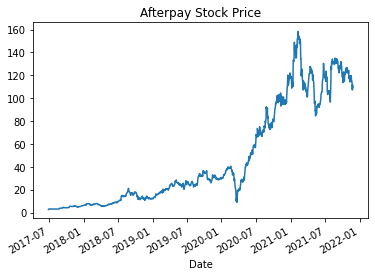

In [14]:
aptticker = yf.Ticker('APT.AX')
apt_df    = aptticker.history(period="5y")
apt_df.rename(columns = {'Close':'APT Close'}, inplace = True)
apt_df['APT Close'].plot(title="Afterpay Stock Price")

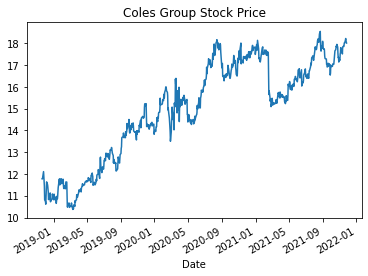

In [15]:
colticker = yf.Ticker('COL.AX')
col_df    = colticker.history(period="5y")
col_df.rename(columns = {'Close':'COL Close'}, inplace = True)
col_df['COL Close'].plot(title="Coles Group Stock Price")

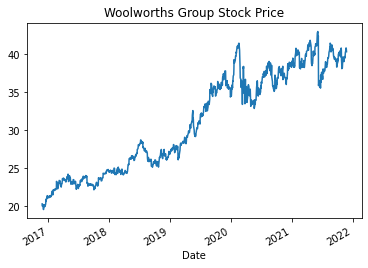

In [16]:
wowticker = yf.Ticker('WOW.AX')
wow_df    = wowticker.history(period="5y")
wow_df.rename(columns = {'Close':'WOW Close'}, inplace = True)
wow_df['WOW Close'].plot(title="Woolworths Group Stock Price")

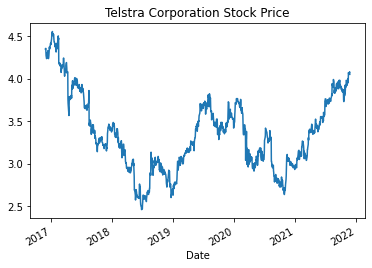

In [17]:
tlsticker = yf.Ticker('TLS.AX')
tls_df    = tlsticker.history(period="5y")
tls_df.rename(columns = {'Close':'TLS Close'}, inplace = True)
tls_df['TLS Close'].plot(title="Telstra Corporation Stock Price")

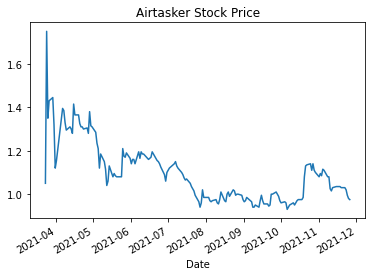

In [18]:
artticker = yf.Ticker('ART.AX')
art_df    = artticker.history(period="5y")
art_df.rename(columns = {'Close':'ART Close'}, inplace = True)
art_df['ART Close'].plot(title="Airtasker Stock Price")

In [19]:
import pandas as pd
df = pd.concat([apt_df['APT Close'], col_df['COL Close'], wow_df['WOW Close'],tls_df['TLS Close'], art_df['ART Close']], axis=1)

In [20]:
df.head()

,APT Close,COL Close,WOW Close,TLS Close,ART Close
Date,,,,,
2016-11-28,NaN,NaN,20.324518,4.347471,NaN
2016-11-29,NaN,NaN,20.149683,4.347471,NaN
2016-11-30,NaN,NaN,20.009815,4.356097,NaN
2016-12-01,NaN,NaN,20.228355,4.312967,NaN
2016-12-02,NaN,NaN,20.053524,4.269837,NaN


#5 year plot for comparison

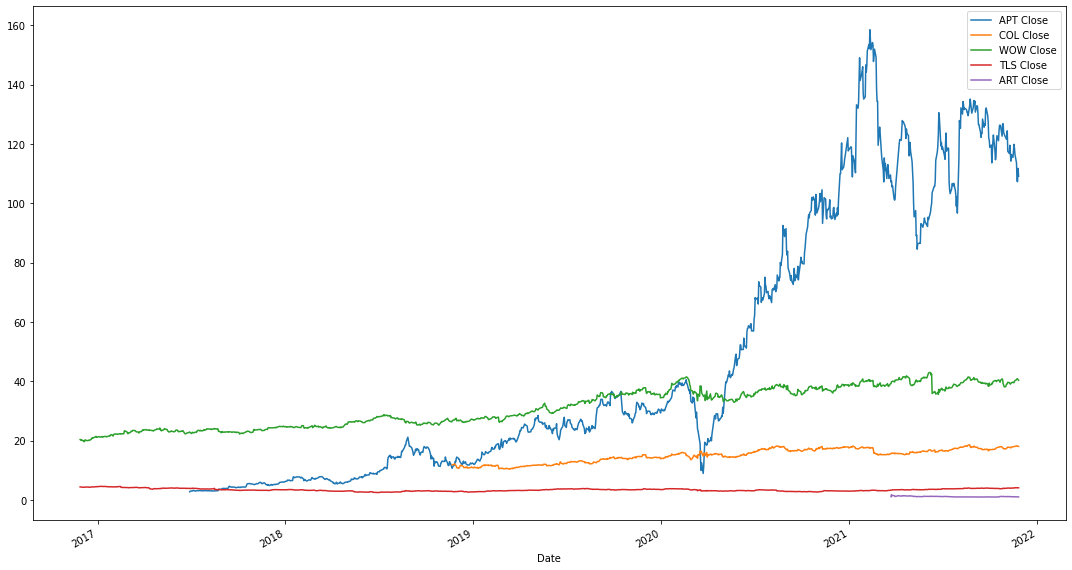

In [21]:
import matplotlib as plt
df.plot()
fig = plt.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [22]:
returns=df.pct_change()

In [23]:
returns.tail()

,APT Close,COL Close,WOW Close,TLS Close,ART Close
Date,,,,,
2021-11-22,-0.024652,0.007218,0.006464,0.000000,0.000000
2021-11-23,-0.053721,0.004410,0.007905,0.002463,-0.009709
2021-11-24,-0.001861,-0.007135,-0.000245,0.000000,-0.024510
2021-11-25,0.041865,-0.001106,-0.007110,0.002457,-0.015075
2021-11-26,-0.023716,-0.003320,-0.004691,-0.007353,-0.005102


#Setting up a hypothetical portfolio

In [24]:
import numpy as np
weights   = np.array([.20, .20, .20, .20, .20]) #Allocating equal weights to the stocks in our portfolio
initinv   = 1000000 #Initial investment in dollars

In [25]:
cov_matrix = returns.cov()
cov_matrix

,APT Close,COL Close,WOW Close,TLS Close,ART Close
APT Close,0.002129,0.000160,0.000090,0.000087,0.000277
COL Close,0.000160,0.000229,0.000134,0.000086,0.000046
WOW Close,0.000090,0.000134,0.000160,0.000060,0.000053
TLS Close,0.000087,0.000086,0.000060,0.000202,-0.000034
ART Close,0.000277,0.000046,0.000053,-0.000034,0.004003


In [26]:
avgreturns = returns.mean()
avgreturns

APT Close    0.004357
COL Close    0.000671
WOW Close    0.000622
TLS Close    0.000046
ART Close    0.001203
dtype: float64

In [29]:
portfoliomean  = avgreturns.dot(weights)
portfoliostd   = np.sqrt(weights.T.dot(cov_matrix).dot(weights))  
invmean        = (1+portfoliomean) * initinv
invstd         = initinv * portfoliostd  

In [30]:
from scipy.stats import norm
conf = 0.05
confcutoff = norm.ppf(conf, invmean, invstd) 
var = initinv - confcutoff      

In [31]:
var

29198.582830677507

#Interpretation

The VaR value above of 29,198 means that:

We can say with 95% confidence that on an initial investment of AUD 1 million, our losses will NOT exceed AUD 29,198.